# overlap study for bioconda and biotools

## get list of biotools entries

In [6]:
import requests
biotools_list = []
next_biotools_page = '?page=1'
while next_biotools_page is not None:
    print('getting page %s' % next_biotools_page)
    page = requests.get('https://bio.tools/api/tool/' + next_biotools_page).json()
    biotools_list += page['list']
    next_biotools_page = page['next']

getting page ?page=1
getting page ?page=2
getting page ?page=3
getting page ?page=4
getting page ?page=5
getting page ?page=6
getting page ?page=7
getting page ?page=8
getting page ?page=9
getting page ?page=10
getting page ?page=11
getting page ?page=12
getting page ?page=13
getting page ?page=14
getting page ?page=15
getting page ?page=16
getting page ?page=17
getting page ?page=18
getting page ?page=19
getting page ?page=20
getting page ?page=21
getting page ?page=22
getting page ?page=23
getting page ?page=24
getting page ?page=25
getting page ?page=26
getting page ?page=27
getting page ?page=28
getting page ?page=29
getting page ?page=30
getting page ?page=31
getting page ?page=32
getting page ?page=33
getting page ?page=34
getting page ?page=35
getting page ?page=36
getting page ?page=37
getting page ?page=38
getting page ?page=39
getting page ?page=40
getting page ?page=41
getting page ?page=42
getting page ?page=43
getting page ?page=44
getting page ?page=45
getting page ?page=

getting page ?page=362
getting page ?page=363
getting page ?page=364
getting page ?page=365
getting page ?page=366
getting page ?page=367
getting page ?page=368
getting page ?page=369
getting page ?page=370
getting page ?page=371
getting page ?page=372
getting page ?page=373
getting page ?page=374
getting page ?page=375
getting page ?page=376
getting page ?page=377
getting page ?page=378
getting page ?page=379
getting page ?page=380
getting page ?page=381
getting page ?page=382
getting page ?page=383
getting page ?page=384
getting page ?page=385
getting page ?page=386
getting page ?page=387
getting page ?page=388
getting page ?page=389
getting page ?page=390
getting page ?page=391
getting page ?page=392
getting page ?page=393
getting page ?page=394
getting page ?page=395
getting page ?page=396
getting page ?page=397
getting page ?page=398
getting page ?page=399
getting page ?page=400
getting page ?page=401
getting page ?page=402
getting page ?page=403
getting page ?page=404
getting pag

_and get the list of biotools ids for these entries_

In [28]:
from pandas import DataFrame
biotools_ids = [element['id'] for element in biotools_list]
biotools_ids_processed = {}
for b in biotools_list:
    if 'BioConductor' in b['collectionID']:
        biotools_ids_processed['BIOCONDUCTOR-%s' % b['id'].upper()] = b['id']
    if 'EMBOSS' in b['collectionID']:
        biotools_ids_processed['BIOCONDUCTOR-%s' % b['id'].upper()] = b['id']
    else:
        biotools_ids_processed[b['id'].upper()] = b['id']
biotools_ids = DataFrame(list(biotools_ids_processed.items()), columns=['common', 'biotools'])
biotools_ids = biotools_ids.set_index('common')

## get list of bioconda entries

In [9]:
#repodata_url = 'https://conda.anaconda.org/bioconda/linux-64/repodata.json'
#repodata = requests.get(repodata_url).json()
!rm repodata.json && wget https://conda.anaconda.org/bioconda/linux-64/repodata.json
import json
bioconda_list = json.load(open('repodata.json'))

--2017-10-10 12:20:14--  https://conda.anaconda.org/bioconda/linux-64/repodata.json
Resolving conda.anaconda.org (conda.anaconda.org)... 104.16.193.233, 104.16.192.233
Connecting to conda.anaconda.org (conda.anaconda.org)|104.16.193.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘repodata.json’

repodata.json           [<=>                 ]   5,38M  1,23MB/s    in 8,2s    

2017-10-10 12:20:23 (669 KB/s) - ‘repodata.json’ saved [5642605]



In [10]:
print(len(bioconda_list['packages'].items()))

10261


_and get the list of bioconda package names_

In [30]:
#bioconda_ids = [element['name'] for element in bioconda_list]
#print(bioconda_ids))
bioconda_ids = set([package['name'] for key, package in bioconda_list['packages'].items()])
bioconda_ids_processed = {}
for bioconda_id in bioconda_ids:
    if len(bioconda_id.split('-'))>1 and bioconda_id.split('-')[0]!='bioconductor':
        bioconda_ids_processed[bioconda_id.split('-')[1].upper()] = bioconda_id
    else:
        bioconda_ids_processed[bioconda_id.upper()] = bioconda_id
bioconda_ids = DataFrame(list(bioconda_ids_processed.items()), columns=['common', 'bioconda'])
bioconda_ids = bioconda_ids.set_index('common')
print(biotools_ids)
print(bioconda_ids)

                                                biotools
common                                                  
BINDN                                              bindn
CLEANTRANSCRIPTFILE-IP            cleantranscriptfile-ip
DENDRIX                                          dendrix
REFPLUS                                          refplus
ALGGEN                                            alggen
IELM                                                ielm
PROTEOME-PI                                  proteome-pi
CROPPAL                                          croppal
OGSA                                                ogsa
KEGG                                                kegg
FASTA                                              fasta
SEQUENCESERVER                            SequenceServer
HGV_LINKTOGPROFILE-IP              hgv_linktogprofile-ip
BIOCONDUCTOR-RDISOP                               rdisop
GMRP                                                gmrp
BIOCONDUCTOR-SUPRAHEX          

this is the intersection of biotools/biocondas entries, based on strict name equality

In [38]:
bioconda_ids.join(biotools_ids).to_csv('mapping.csv',na_rep='null')
bioconda_ids.join(biotools_ids).dropna().to_csv('mapping_matchonly.csv',na_rep='null')


[]


In [122]:
not_in_bioconda =  set([b.upper() for b in biotools_ids]) - set([b.upper() for b in bioconda_ids])


In [125]:
not_in_biotools = set([b.upper() for b in bioconda_ids]) - set([b.upper() for b in biotools_ids])
print(not_in_biotools)

set()


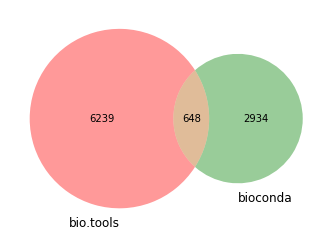

In [111]:
%matplotlib inline
from matplotlib_venn import venn2
venn2(subsets=(len(biotools_ids), len(bioconda_ids), intersection), set_labels = ('bio.tools', 'bioconda', 'overlap'))

questions:
* non-bioinformatics conda packages (yamllint?)
* packages that include a version number in biotools: ggplot2


In [68]:
[package for key, package in bioconda_list['packages'].items() if package['name']=='bioconductor-variantannotation']

[{'arch': 'x86_64',
  'binstar': {'channel': 'main',
   'owner_id': '55f35cc885a76554d7c66613',
   'package_id': '562657e9d6f51f0b163323ba'},
  'build': '0',
  'build_number': 0,
  'depends': ['bioconductor-annotationdbi >=1.27.9',
   'bioconductor-biobase',
   'bioconductor-biocgenerics >=0.15.3',
   'bioconductor-biostrings >=2.33.5',
   'bioconductor-bsgenome >=1.37.6',
   'bioconductor-genomeinfodb >=1.1.3',
   'bioconductor-genomicfeatures >=1.19.17',
   'bioconductor-genomicranges >=1.19.47',
   'bioconductor-iranges >=2.3.25',
   'bioconductor-rsamtools >=1.19.52',
   'bioconductor-rtracklayer >=1.25.16',
   'bioconductor-s4vectors >=0.7.11',
   'bioconductor-summarizedexperiment >=0.3.1',
   'bioconductor-xvector >=0.5.6',
   'bioconductor-zlibbioc',
   'r >=2.8.0',
   'r-dbi'],
  'license': 'Artistic-2.0',
  'machine': 'x86_64',
  'md5': '7e2c7475f6d59cdddbb995aa969b57f3',
  'name': 'bioconductor-variantannotation',
  'operatingsystem': 'linux',
  'platform': 'linux',
  'requi

In [75]:
len([element for element in biotools_list if 'EMBOSS' in element['collectionID']])

253